In [ ]:
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [22]:
#train_dataset_image_Scaled = np.load('/content/drive/MyDrive/Applied/Exam/Data/Data 5 percent/train_dataset_image_Scaled_5_percent.npy')
#train_dataset_label = np.load('/content/drive/MyDrive/Applied/Exam/Data/Data 5 percent/train_dataset_label_5_percent.npy')

#test_dataset_image_Scaled = np.load('/content/drive/MyDrive/Applied/Exam/Data/Data 5 percent/test_dataset_image_Scaled_5_percent.npy')
#test_dataset_label = np.load('/content/drive/MyDrive/Applied/Exam/Data/Data 5 percent/test_dataset_label_5_percent.npy')

validation_dataset_image_Scaled = np.load('/content/drive/MyDrive/Applied/Exam/Data/Data 5 percent/validation_dataset_image_Scaled_5_percent.npy')
validation_dataset_label = np.load('/content/drive/MyDrive/Applied/Exam/Data/Data 5 percent/validation_dataset_label_5_percent.npy')





train_dataset_image_Scaled = np.load('/content/drive/MyDrive/Applied/Exam/Data/Data 10 percent/train_dataset_image_Scaled_10_percent.npy')
train_dataset_label = np.load('/content/drive/MyDrive/Applied/Exam/Data/Data 10 percent/train_dataset_label_10_percent.npy')

test_dataset_image_Scaled = np.load('/content/drive/MyDrive/Applied/Exam/Data/Data 10 percent/test_dataset_image_Scaled_10_percent.npy')
test_dataset_label = np.load('/content/drive/MyDrive/Applied/Exam/Data/Data 10 percent/test_dataset_label_10_percent.npy')


# Seeing how the distribution is between the two classes

In [ ]:
# How many labels are there
unique_train, counts_train = np.unique(train_dataset_label, return_counts = True)
print(np.asarray((unique_train, counts_train)).T)

# How many labels are there
unique_test, counts_test = np.unique(validation_dataset_label, return_counts = True)
print(np.asarray((unique_test, counts_test)).T)

[[   0 6563]
 [   1 6544]]
[[  0 814]
 [  1 824]]


# Initiating SVM classifier, with RBF kernel, and predicting

In [ ]:
svm = svm.SVC(kernel='rbf')
svm.fit(train_dataset_image_Scaled, train_dataset_label)
y_pred_svm = svm.predict(validation_dataset_image_Scaled)

# Make confusion matrix with results

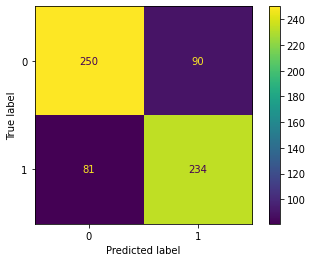

73.89

In [ ]:
cm_svm = confusion_matrix(validation_dataset_label, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(cm_svm)
ac_score_svm = accuracy_score(validation_dataset_label, y_pred_svm)
disp_svm.plot()
plt.show()
round(ac_score_svm * 100, 2)

# Finding an optimization for SVM through random gridsearch

In [ ]:
svm = svm.SVC(kernel='rbf')
svm_params = {'C':[.1, .4], 'kernel':['rbf']}
svm_optimization = GridSearchCV(svm, svm_params, cv=5, verbose=4)

In [ ]:
svm_optimization.fit(train_dataset_image_Scaled, train_dataset_label)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 0.4], 'kernel': ['rbf']})

In [ ]:
print(svm_optimization.best_params_)

{'C': 0.4, 'kernel': 'rbf'}


In [ ]:
best_svm = svm.SVC(kernel='rbf', C = 1)
best_svm.fit(train_dataset_image_Scaled, train_dataset_label)
y_pred_best_svm = best_svm.predict(validation_dataset_image_Scaled)

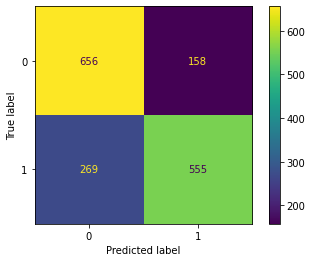

73.93

In [ ]:
cm_best_svm = confusion_matrix(validation_dataset_label, y_pred_best_svm)
disp_best_svm = ConfusionMatrixDisplay(cm_svm)
ac_score_best_svm = accuracy_score(validation_dataset_label, y_pred_best_svm)
disp_best_svm.plot()
plt.show()
round(ac_score_best_svm * 100, 2)

# Using the best SVM model to predict on the testing data

In [ ]:
y_pred_best_svm_testing = best_svm.predict(test_dataset_image_Scaled)

cm_best_svm_test = confusion_matrix(test_dataset_label, y_pred_best_svm_testing)
disp_best_svm_test = ConfusionMatrixDisplay(cm_best_svm_test)
ac_score_best_svm_test = accuracy_score(test_dataset_label, y_pred_best_svm_testing)
disp_best_svm_test.plot()
plt.show()
round(ac_score_best_svm * 100, 2)

# Now initiate the LightGBM boosting classifier and then plotting confusion matrix

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(train_dataset_image_Scaled, train_dataset_label)
y_pred_lgbm = lgbm.predict(validation_dataset_image_Scaled)

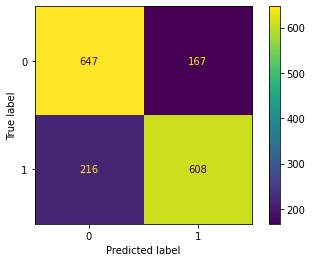

76.62

In [ ]:
cm_lgbm = confusion_matrix(validation_dataset_label, y_pred_lgbm)
disp_lgbm = ConfusionMatrixDisplay(cm_lgbm)
ac_score_lgbm = accuracy_score(validation_dataset_label, y_pred_lgbm)
disp_lgbm.plot()
plt.show()
round(ac_score_lgbm * 100, 2)

# Finding an optimization for LightGBM through random gridsearch

In [ ]:
lgbm_params = {'n_estimators':[600, 800, 1000],'boosting_type':['dart', 'rf'],'num_leaves':[30, 35, 40], 'max_depth':[40, 45, 50],
             'learning_rate':[.1, .12, .14], 'min_child_samples':[5, 10, 15]}
lgbm_optimization = RandomizedSearchCV(lgbm, lgbm_params)

In [ ]:
lgbm_optimization.fit(train_dataset_image_Scaled, train_dataset_label)
print(lgbm_optimization.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py", line 734, in fit
    super(LGBMClassifier, self).fit(X, _y, sample_weight=sample_weight,
  File "/usr/local/lib/python3.8/dist-packages/lightgbm/sklearn.py", line 538, in fit
    self._Booster = train(params, train_set,
  File "/usr/local/lib/python

{'num_leaves': 40, 'n_estimators': 800, 'min_child_samples': 15, 'max_depth': 40, 'learning_rate': 0.12, 'boosting_type': 'dart'}


# Using the parameters from the grid search and finding the score for the best LightGBM model

In [25]:
best_lgbm = LGBMClassifier(num_leaves=40, n_estimators=800, min_child_samples=15, max_depth=40, learning_rate=.12, boosting_type='dart')
best_lgbm.fit(train_dataset_image_Scaled, train_dataset_label)
y_pred_best_lgbm = best_lgbm.predict(validation_dataset_image_Scaled)

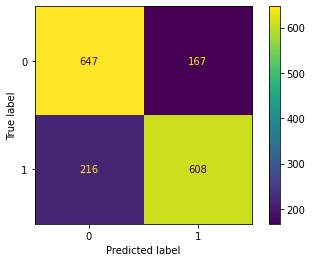

76.07

In [26]:
cm_best_lgbm = confusion_matrix(validation_dataset_label, y_pred_best_lgbm)
disp_best_lgbm = ConfusionMatrixDisplay(cm_lgbm)
ac_score_best_lgbm = accuracy_score(validation_dataset_label, y_pred_best_lgbm)
disp_best_lgbm.plot()
plt.show()
round(ac_score_best_lgbm * 100, 2)

# Using the best LightGBM model to predict on the testing data

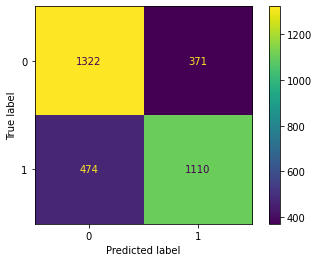

76.07

In [27]:
y_pred_best_lgbm_testing = best_lgbm.predict(test_dataset_image_Scaled)

cm_best_lgbm_test = confusion_matrix(test_dataset_label, y_pred_best_lgbm_testing)
disp_best_lgbm_test = ConfusionMatrixDisplay(cm_best_lgbm_test)
ac_score_best_lgbm_test = accuracy_score(test_dataset_label, y_pred_best_lgbm_testing)
disp_best_lgbm_test.plot()
plt.show()
round(ac_score_best_lgbm * 100, 2)